# Vacinação Geral no Brasil

![](https://raw.githubusercontent.com/diascarolina/vacinacao-geral-no-brasil/main/other/banner.jpg?token=AH6WME4BOFRN6LIHPSJL6KDAZVPJW)

# Sumário

- [1 Introdução](#intro)
- [2 Dados](#dados)
- [3 Importação das Bibliotecas & Configurações](#import)
- [4 Limpeza dos Dados](#clean)
- [5 Panorama Geral da Vacinação no Brasil](#vacina)
    - [5.1 Cobertura Vacinal por Região do Brasil, de 1994 a 2019](#cv)
        - [5.1.2 Análise Gráfica](#analiseum)
    - [5.2 Cobertura Vacinal e Valor Absoluto por Imunizantes no Brasil em 2015](#cv2)
        - [5.2.2 Análise Gráfica](#analisedois)
    - [5.3 Linha do Tempo da Vacinação no Brasil, de 1994 a 2019](#linha)
- [6 Conclusão](#conc)
- [7 Referências](#ref)

<a name="intro"></a>
# 1 Introdução

<a href="https://github.com/diascarolina/vacinacao-geral-no-brasil/blob/main/other/syringe.png">
	<img align="right" src="https://raw.githubusercontent.com/diascarolina/vacinacao-geral-no-brasil/main/other/syringe.png?token=AH6WMEZBFIPTIFQTPBFZKFDAZQRI6">
</a>

Já é de conhecimento de todos que o principal assunto dos últimos meses, nos quais estamos vivendo em uma pandemia de Covid-19, é a vacinação. Diariamente checamos a quantidade de pessoas já vacinadas e aguardamos ansiosamente o momento em que poderemos dizer "Estou imunizado contra a Covid (com a PIFAIZÊR)". Mas será que já enfrentamos algo parecido? Em uma escala mundial talvez não recentemente, mas em uma escala regional não é a primeira vez que ficamos à mercê de doenças que poderiam ser evitadas com uma vacinação efetiva.

É nesse contexto que torna-se relevante olharmos para o passado e estudarmos casos anteriores de doenças que foram superadas com vacinas, as chamadas doenças imunopreveníveis, para que possamos traçar um paralelo com os dias de hoje, pois, como diria aquela famosa frase atribuída ao filósofo irlandês Edmund Burke, _"Aqueles que não conhecem a história estão fadados a repeti-la."_ Pelo surgimento e avanço de grupos anti-vacina e pelo comportamento de quem deveria estar liderando o país, parece que essa lição não foi aprendida.

Assim, iniciaremos com uma análise geral sobre os imunizantes mais aplicados e utilizados no calendário vacinal brasileiro. Buscamos validar duas hipóteses propostas e que, à primeira vista, nos parecem óbvias:

> **Hipótese 1:** A cobertura vacinal vem crescendo anualmente em todo o país.

> **Hipótese 2:** Vacinas que devem ser aplicadas em bebês logo após o nascimento, como a BCG e da Hepatite B, principalmente, possuem maior cobertura vacinal e também maior valor absoluto de aplicações.

<div class="alert alert-success">
    <strong>Clique <a href='https://github.com/diascarolina/vacinacao-geral-no-brasil/blob/main/notebooks/sarampo.ipynb'>aqui</a> para acessar a Parte 2, na qual faço uma análise sobre o surto de Sarampo ocorrido entre 2013 a 2015 em Pernambuco e no Ceará.</strong>
</div>

<a name="dados"></a>
# 2 Dados

<a href="https://raw.githubusercontent.com/diascarolina/vacinacao-geral-no-brasil/main/other/pni.png?token=AH6WME7VQUE662N2BI6F6Q3AZQQRQ">
	<img align="right" src="https://raw.githubusercontent.com/diascarolina/vacinacao-geral-no-brasil/main/other/pni.png?token=AH6WME7VQUE662N2BI6F6Q3AZQQRQ">
</a>

Os dados utilizados nas análises foram obtidos através do dados abertos do Sistema Único de Saúde (SUS), mais especificamente os dados do [Programa Nacional de Imunização (PNI)](http://pni.datasus.gov.br/apresentacao.asp). Criado em 1973 pelo Ministério da Saúde, o PNI tem como objetivo coordenar as ações de imunizações em todo o território nacional, traçando diretrizes e prestando serviços integrais de saúde através de sua rede própria. É uma ferramenta essencial para a manutenção da saúde pública brasileira, tendo sido responsável por erradicar ou controlar diversas doenças imunopreveníveis, como o sarampo, a Hepatite B, e a Poliomielite.

Com essa contextualização, vamos à parte técnica dos dados.

**Caminho para a obtenção dos dados brutos:** [TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02) ➔ [Assistência à Saúde](http://www2.datasus.gov.br/DATASUS/index.php?area=0202) ➔ [Imunizações - desde 1994](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11637) ➔ [Doses Aplicadas](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)

Nesta última página foram feitas as seguintes seleções:
- **Linha:** Imuno ou Ano, dependendo da análise feita;
- **Coluna**: Região (do país);
- **Medidas:** Coberturas Vacinais ou Doses Cálculos CV, a depender da análise;
- **Períodos Disponíveis**: todos os anos de 1994 a 2019;

Esses dados foram atualizados pela última vez em 04/09/2019. Uma versão mais recente desses dados pode ser encontrada nessa [página do DATASUS](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) que teve última atualização em 10/06/2021. Uma nova análise futura poderá utilizar esses dados mais recentes.

Também há um documento com as [Notas Técnicas](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf) para os dados. Nele encontramos a **origem** e a **descrição** de algumas variáveis presentes nos dados. Como mais relevante destaco a seguinte informação, que nos diz como é feito o cálculo da cobertura vacinal, que representa uma porcentagem da população alvo que recebeu o imunizante:

> _"A fórmula de cálculo da cobertura é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100. Exemplo: para a Tetravalente (DTP/Hib), considera-se o número de terceiras doses aplicadas na faixa etária de menores de 1 ano. Para a vacina oral de rotavírus humano, pode-se avaliar cobertura de 1ª e 2ª doses."_



<a name="import"></a>
# 3 Importação das Bibliotecas & Configurações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from wordcloud import WordCloud
from PIL import Image

In [2]:
# formatar os números para mostrarem duas casa decimais
pd.options.display.float_format = '{:.2f}'.format

# configurações de cores
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configurações da fonte utilizada nos gráficos
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.it'] = 'Arial:italic'

<a name="clean"></a>
# 4 Limpeza dos Dados

Por questões de tamanho e organização, a parte de limpeza dos datasets foi realizada em um outro notebook linkado a seguir:

<div class="alert alert-success">
    <strong><a href='https://github.com/diascarolina/vacinacao-geral-no-brasil/blob/main/notebooks/limpeza_dados.ipynb'>Notebook com a limpeza dos dados.</a></strong>
</div>

Cada arquivo _.csv_ com os dados brutos utilizados foi tratado no notebook acima e salvo uma nova versão com os dados limpos que são os dados importados no notebook atual.

<a name="vacina"></a>
# 5 Panorama Geral da Vacinação no Brasil

Aqui nessa primeira parte daremos um panorama geral de como andam as coberturas vacinais no país no período de 1994 a 2019, além de analisarmos quais as vacinas mais aplicadas em números absolutos. Para termos uma base para seguirmos nessa análise, levantamos duas hipóteses:
- **Hipótese 1:** A cobertura vacinal vem crescendo anualmente em todo o país.
- **Hipótese 2:** Vacinas que devem ser aplicadas em bebês logo após o nascimento, como a [BCG e da Hepatite B](https://www.unimedlondrina.com.br/noticias/tudo-saude/07/06/2018/vacinas-importantes-recem-nascidos/), principalmente, possuem maior cobertura vacinal e também maior valor absoluto de aplicações.

<a name="cv"></a>
## 5.1 Cobertura Vacinal por Região do Brasil, de 1994 a 2019

Aqui iremos considerar a cobertura vacinal de todos os imunizantes presentes na base de dados. Esse total é a média de todos os 26 imunizantes (aqui considerando também a quantidade de doses que cada um necessita).

Muitos dos imunizantes tiveram um determinado período em que foram utilizados no calendário vacinal brasileiro, como, por exemplo, a vacina Dupla Viral, que esteve presente de 2001 a 2004, vindo a ser substituída pela tríplice viral, como visto nas [Notas Técnicas](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf).

Como já fizemos a limpeza dos dados anteriormente, podemos já importar o dataset e analisá-lo.

In [3]:
# importação dos dados da cobertura vacinal por região
cv_reg = pd.read_csv('../dados/clean/cv_reg.csv', encoding = 'ISO-8859-1', index_col = 'Unnamed: 0')

In [4]:
cv_reg.head()

,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Total
1994,31.03,40.52,55.22,51.60,25.84,38.27
1995,41.67,43.78,46.43,51.24,45.10,45.70
1996,55.20,50.91,44.66,53.84,52.54,50.00
1997,68.57,65.71,70.58,71.50,69.92,68.95
1998,73.28,66.45,74.42,65.09,76.53,70.65


A coluna ```Total``` refere-se à média das 5 regiões, então podemos usá-la como métrica para avaliar a cobertura vacinal do Brasil levando em consideração todas as vacinas disponíveis na base de dados.

<a name="analiseum"></a>
### 5.1.2 Análise Gráfica

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


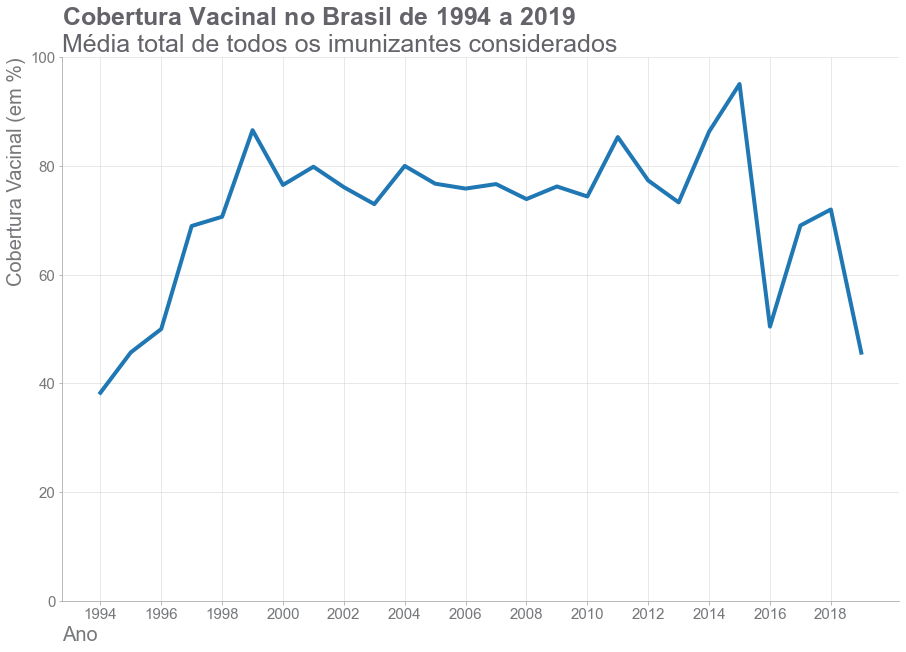

In [5]:
ax = cv_reg['Total'].plot(figsize = (15, 10), linewidth = 4)
plt.ylim(0, 100)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.title('$\\bf{Cobertura\ Vacinal\ no\ Brasil\ de\ 1994\ a\ 2019}$\nMédia total de todos os imunizantes considerados',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Cobertura Vacinal (em %)', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

ax.set_xticks(range(1994, 2020, 2))

plt.grid(color = 'lightgrey', linewidth = 0.5)

plt.show()

Algumas considerações e observações que obtemos não só desse gráfico, mas também do conhecimento que temos da base de dados:
- Os dados foram atualizados pela última vez em **04/09/2019**, como visto no próprio site. Ou seja, as informações sobre 2019 estão incompletas.
- O que aconteceu em **2016** que explique uma **queda tão brusca** na cobertura vacinal? Pelo nosso conhecimento dessa base de dados do Governo, sabemos que os dados sofreram diversas mudanças de infraestrutura ao longo dos anos, até mesmo com inserção duplicada de valores e corrigidas posteriormente. Isso tudo é explicado nas notas de rodapé do [site](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) de onde os dados brutos foram retirados. Então esse ano atípico de 2016 pode muito bem ser explicado por **inconsistências** na base de dados. Mas isso é só uma especulação, não podemos ter certeza sem uma pesquisa mais a fundo.

De **1994 até 2015**, aproximadamente, parece que temos dados mais consistentes. Vamos então observar esse período de tempo.

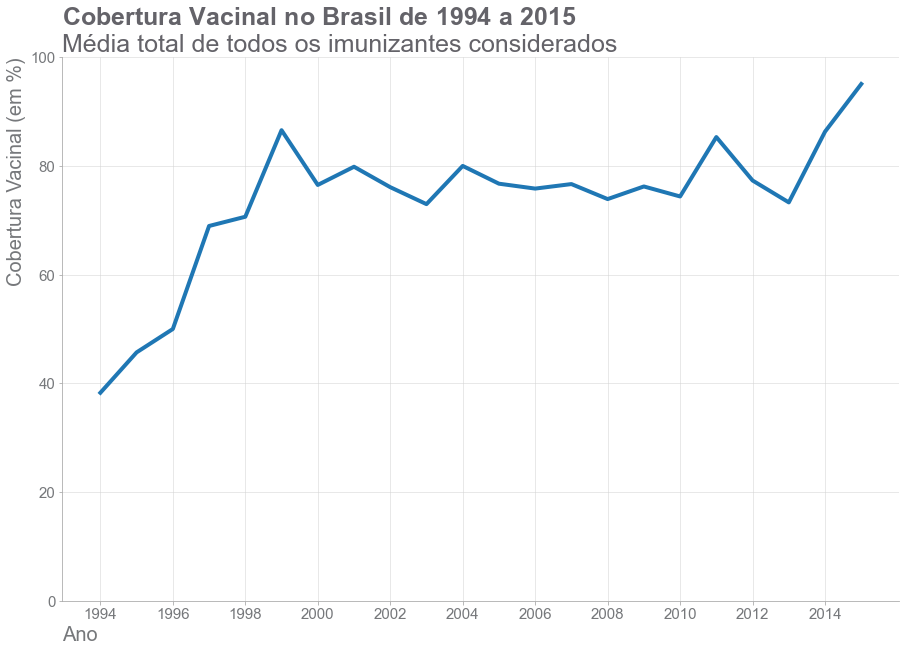

In [6]:
ax = cv_reg[:-4]['Total'].plot(figsize = (15, 10), linewidth = 4)
plt.ylim(0, 100)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.title('$\\bf{Cobertura\ Vacinal\ no\ Brasil\ de\ 1994\ a\ 2015}$\nMédia total de todos os imunizantes considerados',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Cobertura Vacinal (em %)', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

ax.set_xticks(range(1994, 2016, 2))

plt.grid(color = 'lightgrey', linewidth = 0.5)
    
plt.show()

Agora fica mais fácil observar como se comportou a cobertura vacinal no Brasil nesse período. De **1994 a 1999**, é evidente que houve uma grande **alta** na porcentagem analisada. De **1999 a 2013**, houve uma certa **estabilidade** nesse valor, apenas com um pequeno aumento em 2011. A partir de **2013 até 2015**, já voltamos a ter uma **subida** acentuada na cobertura vacinal.

**Seria isso suficiente para responder à nossa Hipótese 1 de que a cobertura vacinal vem crescendo anualmente em todo o país?**

Por mais que tenhamos saído de uma média de menos de 40% em 1994 e chegado a quase 100% em 2015, de um ano para o outro também ocorreram diversas quedas nesse número. No geral podemos afirmar que sim, houve um expressivo aumento na cobertura vacinal de 1994 a 2015, mas não anualmente, e sim como um todo.

<a name="cv2"></a>
## 5.2 Cobertura Vacinal e Valor Absoluto por Imunizante no Brasil em 2015

Agora vamos avaliar a cobertura vacinal de cada vacina específica. Como 2015 é o ano que atingiu maior cobertura vacinal em todo o período analisado, vamos utilizá-lo para análise.

In [7]:
cv_reg_ano = pd.read_csv('../dados/clean/cv_reg_ano.csv', encoding = 'ISO-8859-1')

In [8]:
cv_reg_ano.head()

,Imuno,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,BCG,88.29,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,95.55,97.12,97.72,52.95,100.00
1,Hepatite B em crianças até 30 dias,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,88.54,90.93,81.75,85.20,86.73,48.33,68.79
2,Rotavírus Humano,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,87.06,86.37,93.52,93.44,95.35,88.98,84.65,89.76,52.47,58.57
3,Meningococo C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,100.00,96.18,99.70,96.36,98.19,91.68,87.04,87.50,53.66,61.23
4,Hepatite B,8.85,10.50,16.50,5.79,12.63,83.50,91.08,91.88,91.47,...,97.71,96.67,100.00,96.42,97.74,100.00,86.29,92.91,55.93,78.46


<a name="analisedois"></a>
### 5.2.2 Análise Gráfica

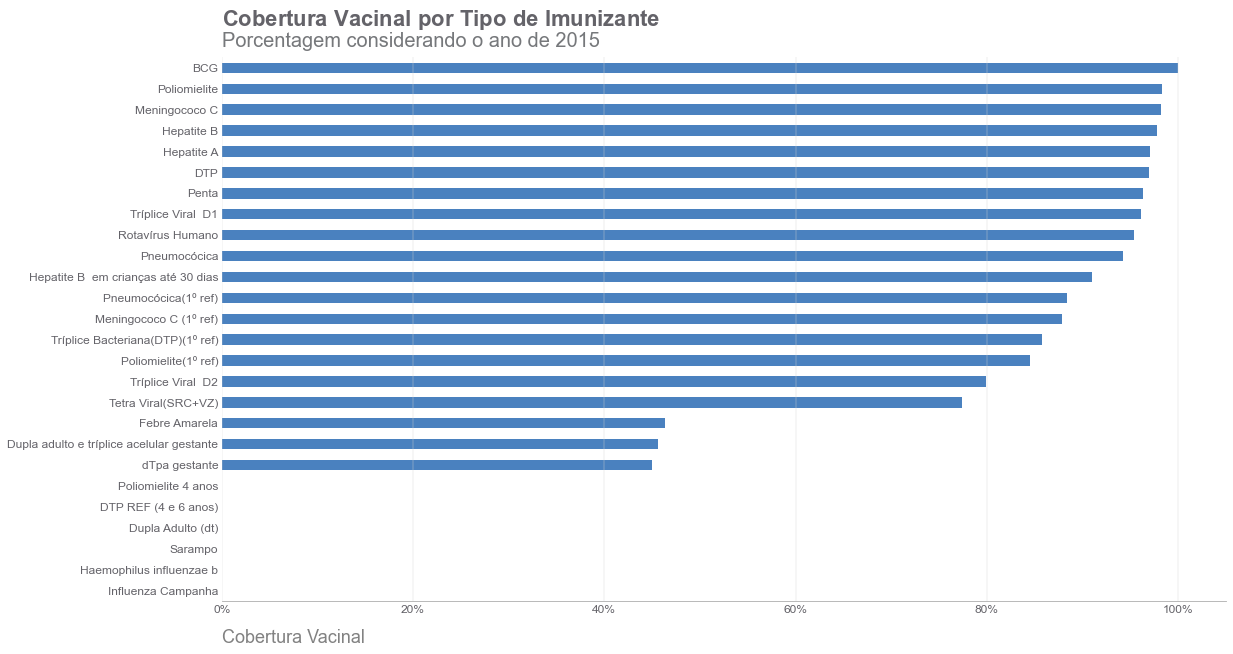

In [9]:
ax = cv_reg_ano.set_index('Imuno').sort_values('2015')['2015'].T.plot(figsize = (18, 10), kind = 'barh', color = BLUE2)

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
sns.despine(left = True)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color(GRAY4)

ax.yaxis.label.set_visible(False)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(100))
plt.grid(axis = 'x', zorder = 0, linewidth = 0.4, color = 'lightgray')

plt.text(0, 27, '$\\bf{Cobertura\ Vacinal\ por\ Tipo\ de\ Imunizante}$',
         fontsize = 22, color = GRAY4)
plt.text(0, 26, 'Porcentagem considerando o ano de 2015',
         fontsize = 20, color = GRAY5)

plt.text(0, -2.5, 'Cobertura Vacinal', fontsize = 18, color = GRAY6)

plt.show()

Esse gráfico já nos ajudar a validar a **Hipótese 2**, pois vemos que realmente as vacinas que possuem uma maior cobertura vacinal são aquelas aplicadas em recém-nascidos, como a vacina BCG e a da Hepatite B, entre outras.

Vacinas com valores de 0% na cobertura vacinal tiveram sua aplicação finalizada antes do período analisado, a saber, 2015.

Para completarmos a **Hipótese 2**, basta analisarmos os valores absolutos dos imunizantes aplicados. Vamos lá?!

Para isso, usarei a soma total de todas as aplicações de imunizantes de 1994 a 2019.

In [10]:
tipo_regiao = pd.read_csv('../dados/clean/tipo_regiao.csv', encoding = 'ISO-8859-1')

In [11]:
tipo_regiao.sort_values('Total', ascending = False).head()

,Imuno,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Total
0,BCG,8934021,25716922,30399265,10320185,6313847,81684240
7,Poliomielite,7274884,22142316,28092416,9575853,5616541,72702010
17,DTP,6473825,19952727,25733142,8974200,5145825,66279719
14,Tríplice Viral D1,5860559,18272998,24617230,7824108,4776620,61351515
4,Hepatite B,6211709,17317816,23733605,8632675,4667998,60563803


Como seria uma uma boa forma de visualizar esse total de imunizantes aplicados? Um clássico gráfico de barras, claro! Mas antes, vamos tentar visualizar com uma "wordcloud", _just for fun!_

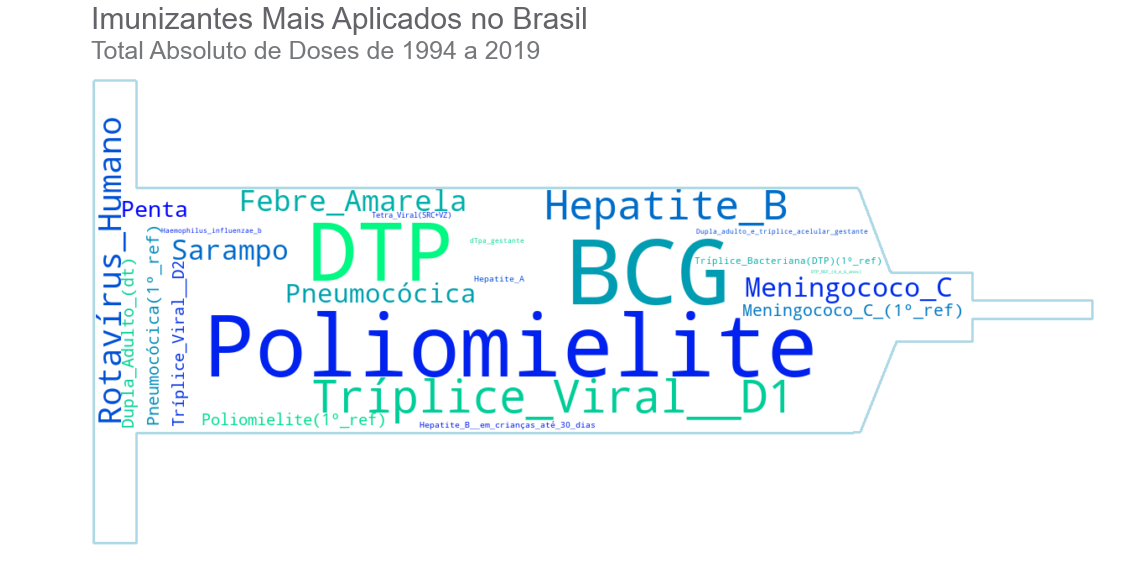

In [12]:
tipo_regiao['Imuno'] = tipo_regiao['Imuno'].str.replace(' ', '_')
tipo_regiao = tipo_regiao[['Imuno', 'Total']]

d = {}
for Imuno, Total in tipo_regiao.values:
    d[Imuno] = Total

vaccine_mask = np.array(Image.open('../other/vacina.png'))
    
wordcloud = WordCloud(background_color = 'white',
                      width = 1000,
                      height = 500,
                      mask = vaccine_mask,
                      contour_width = 3,
                      contour_color = 'lightblue',
                      colormap = 'winter')

wordcloud.generate_from_frequencies(frequencies = d)
plt.figure(figsize = (20, 15))
plt.text(100, -50, 'Imunizantes Mais Aplicados no Brasil', fontsize = 30, color = GRAY4)
plt.text(100, -15, 'Total Absoluto de Doses de 1994 a 2019', fontsize = 25, color = GRAY5)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Se formos nos basear pelo tamanho da fonte, que é como é feita a leitura de uma _wordcloud_, vemos que a vacina BCG e a da Poliomielite são as mais aplicadas, em valores absolutos, seguidas pelo imunizante DPT. Vamos confirmar isso em uma visualização mais tradicional abaixo.

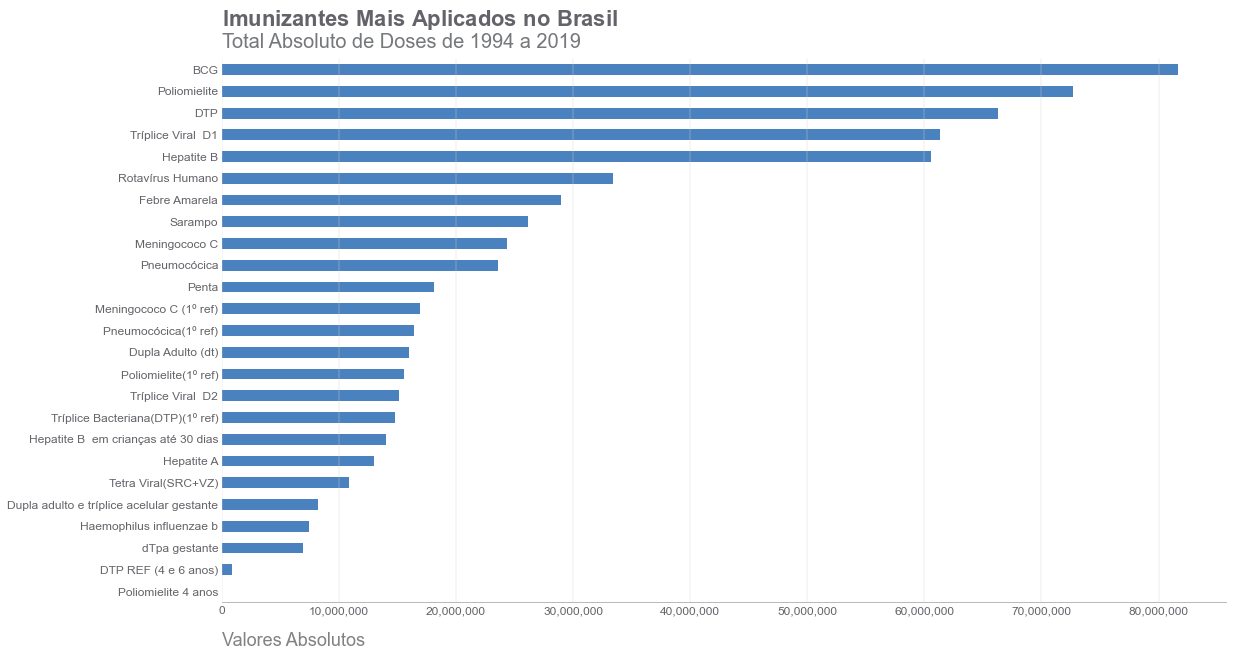

In [13]:
tipo_regiao['Imuno'] = tipo_regiao['Imuno'].str.replace('_', ' ')

ax = tipo_regiao.set_index('Imuno').sort_values('Total')['Total'].T.plot(figsize = (18, 10), kind = 'barh', color = BLUE2)

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
sns.despine(left = True)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color(GRAY4)

ax.yaxis.label.set_visible(False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
plt.grid(axis = 'x', zorder = 1, linewidth = 0.4, color = 'lightgray')

plt.text(-30, 26, '$\\bf{Imunizantes\ Mais\ Aplicados\ no\ Brasil}$',
         fontsize = 22, color = GRAY4)
plt.text(-30, 25, 'Total Absoluto de Doses de 1994 a 2019',
         fontsize = 20, color = GRAY5)

plt.text(0, -2.5, 'Valores Absolutos', fontsize = 18, color = GRAY6)

plt.show()

Finalmente podemos validar nossa **Hipótese 2** a partir dos dados desse gráfico e do dataframe ```tipo_regiao```:
> Vacinas que devem ser aplicadas em bebês logo após o nascimento, como a [BCG e da Hepatite B](https://www.unimedlondrina.com.br/noticias/tudo-saude/07/06/2018/vacinas-importantes-recem-nascidos/), principalmente, possuem maior cobertura vacinal e também maior valor absoluto de aplicações.

Observamos que os imunizantes BCG, Poliomielite e DTP foram os mais aplicados, em valores absolutos, no Brasil, de 1994 a 2019. Esses são, justamente, os aplicados em recém-nascidos.

Isso se explica pois, ao serem aplicados já na maternidade, não há o risco de esquecimento ou falta de vontade para a aplicação dessas vacinas, como ocorre frequentemente com outras que são aplicadas em adultos.

<a name="linha"></a>
## 5.3 Linha do Tempo da Vacinação no Brasil, de 1994 a 2019

Para finalizarmos nossa contextualização geral sobre a vacinação no Brasil de 1994 a 2019 (ano da última atualização dos dados), vamos observar uma linha do tempo de quando cada vacina foi introduzida do calendário vacinal.

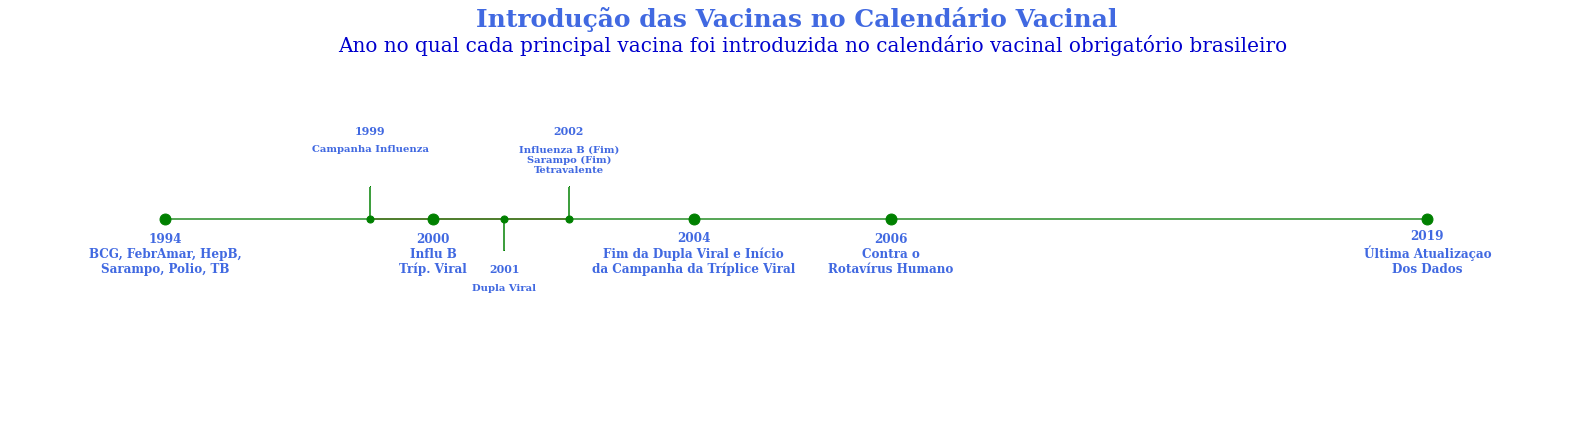

In [14]:
# configuração das informações
datas1 = ['1994\nBCG, FebrAmar, HepB,\nSarampo, Polio, TB',
            '2000\nInflu B\nTríp. Viral',
            '2004\nFim da Dupla Viral e Início\nda Campanha da Tríplice Viral',
            '2006\nContra o\nRotavírus Humano',
            '2019\nÚltima Atualizaçao\nDos Dados']

tl_x = [1, 2.7, 4.35, 5.6, 9]
tl_sub_x = [2.3, 3.15, 3.56]

tl_sub_times = ["1999", "2001", "2002"]
tl_text = ["Campanha Influenza", "Dupla Viral","Influenza B (Fim)\nSarampo (Fim)\nTetravalente"]

# inicialização do gráfico
fig, ax = plt.subplots(figsize = (22, 6), constrained_layout = True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# desenha a linha
ax.axhline(0, xmin = 0.1, xmax = 0.9, c = 'forestgreen', zorder = 1)

# desenha os pontos
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 120, c = 'green', zorder = 2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 30, c = 'green', zorder = 3)
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s = 50, c = 'green', zorder = 4)

# texto
for x, date in zip(tl_x, datas1):
    ax.text(x, -0.5, date, ha = 'center', fontfamily = 'serif', fontweight = 'bold',
    color = 'royalblue', fontsize = 12)

# linhas verticais
levels = np.zeros(len(tl_sub_x))
levels[::-2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection = True)    
plt.setp(baseline, zorder = 0)
plt.setp(markerline, marker = ',', color = 'green')
plt.setp(stemline, color = 'green')

# texto
for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha = 'center', fontfamily = 'serif', fontweight = 'bold',
        color = 'royalblue', fontsize = 11)
    ax.text(x, 1.3*(idx%2)-0.6, txt, va = 'top', ha = 'center', fontweight = 'bold',
        fontfamily = 'serif', color = 'royalblue')

for spine in ['left', 'top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([]) 

ax.set_title('Introdução das Vacinas no Calendário Vacinal',
             fontweight = 'bold', fontfamily = 'serif', fontsize = 25, color = 'royalblue')
ax.text(2.1, 1.57, 'Ano no qual cada principal vacina foi introduzida no calendário vacinal obrigatório brasileiro',
        fontfamily = 'serif', fontsize = 20, color = 'mediumblue')

plt.show()

Essas informações podem ser encontradas nas [Notas Técnicas sobre as Imunizações](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf).

É relevante notar que grande parte dos imunizantes foram introduzidos antes de 1994 (início da contabilização dos dados nessa base) e continuam os mesmos até a data de atualização em 2019. Esses são, por exemplo:
- **BCG** (Contra Tuberculose);
- **FA** (Contra Febre Amarela);
- **HB** (Contra Hepatite B);
- **VOP** (Oral Contra Poliomielite);
- **DTP** (Tríplice Bacteriana).

<a name="conc"></a>
# 6 Conclusão

Após essa análise, conseguimos obter algumas conclusões relevantes e também relacionadas as nossas hipóteses.

- **Hipótese 1:** A cobertura vacinal vem crescendo anualmente em todo o país.
> Por mais que tenhamos saído de uma média de menos de 40% em 1994 e chegado a quase 100% em 2015, de um ano para o outro também ocorreram diversas quedas nesse número. No geral podemos afirmar que sim, houve um expressivo aumento na cobertura vacinal de 1994 a 2015, mas não anualmente, e sim como um todo.


- **Hipótese 2:** Vacinas que devem ser aplicadas em bebês logo após o nascimento, como a [BCG e da Hepatite B](https://www.unimedlondrina.com.br/noticias/tudo-saude/07/06/2018/vacinas-importantes-recem-nascidos/), principalmente, possuem maior cobertura vacinal e também maior valor absoluto de aplicações.
> Observamos que os imunizantes BCG, Poliomielite e DTP foram os mais aplicados, em valores absolutos, no Brasil, de 1994 a 2019. Esses são, justamente, os aplicados em recém-nascidos. Isso se explica pois, ao serem aplicados já na maternidade, não há o risco de esquecimento ou falta de vontade para a aplicação dessas vacinas, como ocorre frequentemente com outras que são aplicadas em adultos.

Por último, em uma linha do tempo visualizamos quando determinados imunizantes foram introduzidos no calendário vacinal brasileiro e notamos que grande parte dos imunizantes foram introduzidos antes de 1994 (início da contabilização dos dados nessa base) e continuam os mesmos até a data de atualização em 2019. Esses são, por exemplo:
- **BCG** (Contra Tuberculose);
- **FA** (Contra Febre Amarela);
- **HB** (Contra Hepatite B);
- **VOP** (Oral Contra Poliomielite);
- **DTP** (Tríplice Bacteriana).

Essa foi a nossa visão geral sobre as vacinas no Brasil.

<a name="ref"></a>
# 7 Referências

- [Programa Nacional de Imunização - Apresentação](http://pni.datasus.gov.br/apresentacao.asp)
- [TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02)
- [DATASUS](https://datasus.saude.gov.br/)
- [Origem dos Dados](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)
- [Notas Técnicas](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf)
- [As Vacinas Importantes Para Recém-Nascidos](https://www.unimedlondrina.com.br/noticias/tudo-saude/07/06/2018/vacinas-importantes-recem-nascidos/)
- [Alura](https://www.alura.com.br/)
- [Bootcamp Data Science Aplicada](https://www.alura.com.br/bootcamp/data-science-aplicada/matriculas-abertas)
- [Storytelling with Data](https://www.storytellingwithdata.com/)
- [Storytelling with Data in Python](https://github.com/empathy87/storytelling-with-data)
- [Numpy](https://numpy.org/](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/](https://matplotlib.org/)

<div class="alert alert-success">
    <strong>Clique <a href=''>aqui</a> para acessar a Parte 2, na qual faço uma análise sobre o surto de Sarampo ocorrido entre 2013 a 2015 em Pernambuco e no Ceará.</strong>
</div>